**LABORATORIO 1**

**Curso:** Text Mining and Image Recognition

**Estudiante:** Cristino Pérez Ramos

**Carné:** 23003993

#Librerias Necesarias

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Problema 1: Filtrar Colores

In [13]:
def filtro(img, n):
  alto = img.shape[0]
  ancho = img.shape[1]
  filter = np.zeros((alto,ancho,3))
  for i in range(0,alto):
    for j in range(0,ancho):
      pixel=(img[i,j])

      blue=pixel[0]
      green = pixel[1]
      red=pixel[2]

      if (n==0):
        filter[i,j]=[0,0,blue]
      elif n==1:
        filter[i,j]=[0,green,0]
      elif n==2:
        filter[i,j]=[red,0,0]
      elif n==10:
        filter[i,j]=[red,green,0]
      elif n==20:
        filter[i,j]=[0,green,blue]
      elif n==30:
        filter[i,j] = [red,0,blue]


  cv2.imwrite("imagenfiltrada.jpg",filter)
  imagen= cv2.imread("/content/imagenfiltrada.jpg")
  plt.imshow(imagen)
  plt.show()


##Probando la función creada

In [14]:
strimg="ciudad.jpg"
img=cv2.imread(strimg,cv2.IMREAD_COLOR)

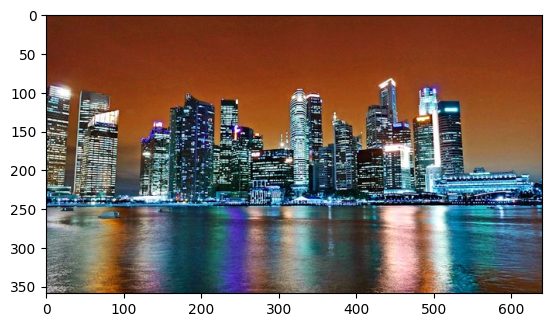

In [15]:
plt.imshow(img)
plt.show()

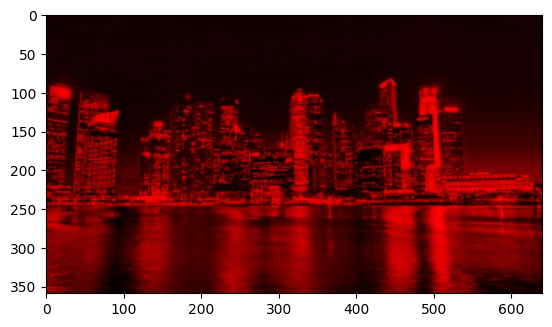

In [16]:
filtro(img,2)  #Mostraremos solo el canal rojo

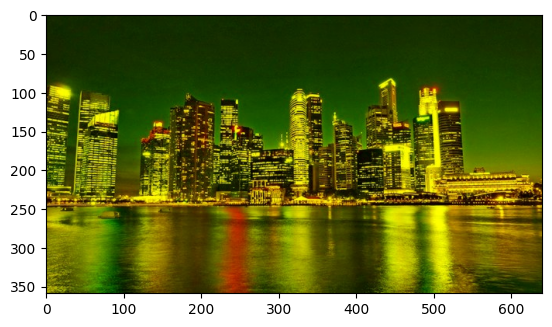

In [19]:
filtro(img,10)  # Los colores rojo y verde activos

#Problema 2: ReContrucción de Imagen

In [22]:
gray_azul="imagen1_salida_gray_azul.jpg"
gray_rojo="imagen1_salida_gray_rojo.jpg"
gray_verde="imagen1_salida_gray_verde.jpg"
img_blue=cv2.imread(gray_azul)
img_red=cv2.imread(gray_rojo)
img_green=cv2.imread(gray_verde)

Mostrar las 3 imágenes

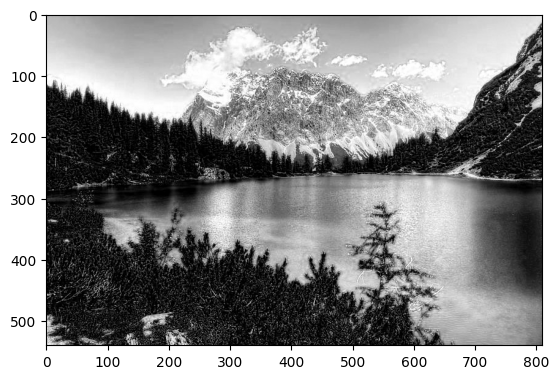

In [30]:
plt.imshow(img_blue)
plt.show()

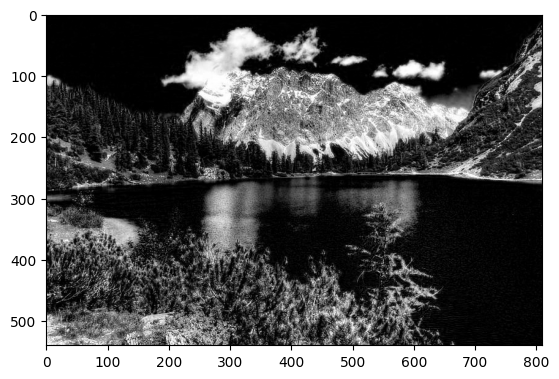

In [31]:
plt.imshow(img_red)
plt.show()

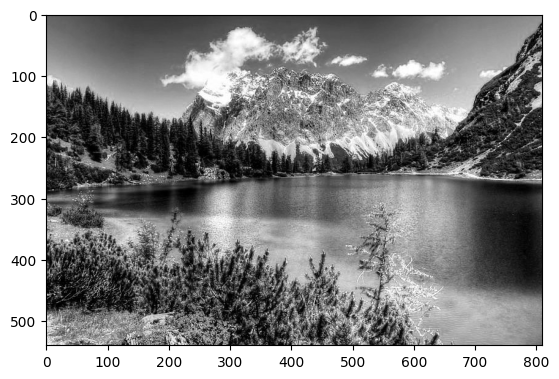

In [32]:
plt.imshow(img_green)
plt.show()

In [66]:
#Función que permite reconstruir la imagen.
def imageBuilding(img_red,img_green,img_blue):
  alto = img_red.shape[0]
  ancho = img_red.shape[1]
  new_image = np.zeros((alto,ancho,3))
  for i in range(0,alto):
    for j in range(0,ancho):
      pixel_red=img_red[i,j]
      pixel_green=img_green[i,j]
      pixel_blue=img_blue[i,j]

      blue=pixel_blue[0]
      green = pixel_green[0]
      red=pixel_red[0]

      new_image[i,j] = [blue,green,red]




  cv2.imwrite("new_image.jpg",new_image)
  imagen= cv2.imread("/content/new_image.jpg")
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
  plt.imshow(imagen)
  plt.show()

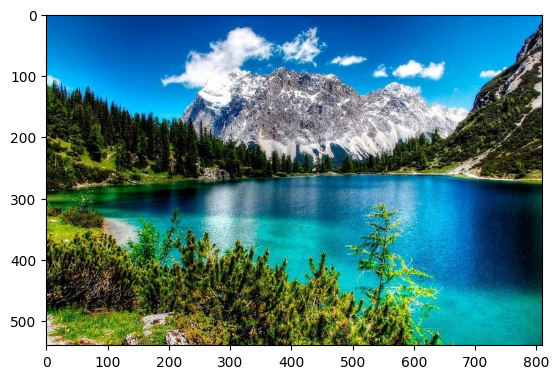

In [67]:
imageBuilding(img_red,img_green,img_blue) #La imagen se construyó bien, ver carpeta Problema 2

#Problema 3: Descomposición en Grises

In [46]:
def grayDecomposition(img):
  alto = img.shape[0]
  ancho = img.shape[1]
  gray_red = np.zeros((alto,ancho,3))
  gray_green = np.zeros((alto,ancho,3))
  gray_blue = np.zeros((alto,ancho,3))
  for i in range(0,alto):
    for j in range(0,ancho):
      pixel=(img[i,j])

      blue=pixel[0]
      green = pixel[1]
      red=pixel[2]

      gray_red[i,j]=[red,red,red]
      gray_blue[i,j]=[blue,blue,blue]
      gray_green[i,j]=[green,green,green]



  cv2.imwrite("imagenx_salida_gray_azul.jpg",gray_blue)
  cv2.imwrite("imagenx_salida_gray_verde.jpg",gray_green)
  cv2.imwrite("imagenx_salida_gray_rojo.jpg",gray_red)

  print("Las 3 imagenes han sido creadas exitosamente!")

##Probando función

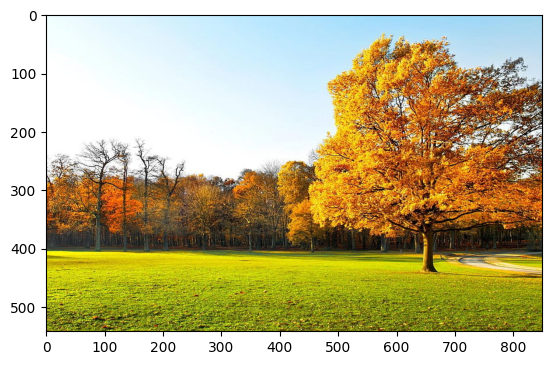

In [49]:
strimg="landscape.jpg"
img=cv2.imread(strimg)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convertimos a RGB
plt.imshow(img)
plt.show()

In [50]:
grayDecomposition(img) #Descomponemos la imagenes en grises

Las 3 imagenes han sido creadas exitosamente!


##Viendo imagenes

In [52]:
gray_azul="imagenx_salida_gray_azul.jpg"
gray_rojo ="imagenx_salida_gray_rojo.jpg"
gray_verde="imagenx_salida_gray_verde.jpg"
gray_blue=cv2.imread(gray_azul)
gray_red=cv2.imread(gray_rojo)
gray_green=cv2.imread(gray_verde)

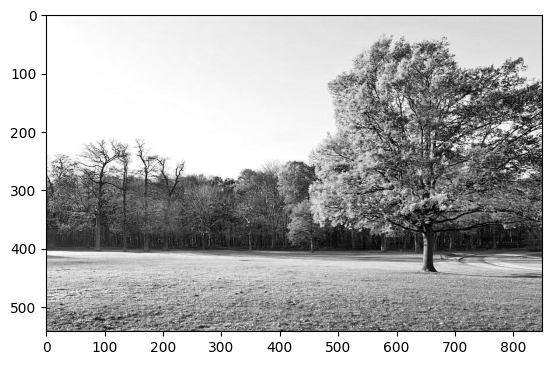

In [53]:
plt.imshow(gray_green)
plt.show()

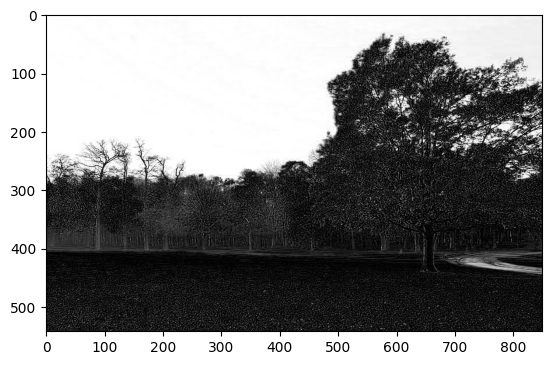

In [55]:
plt.imshow(gray_red)
plt.show()

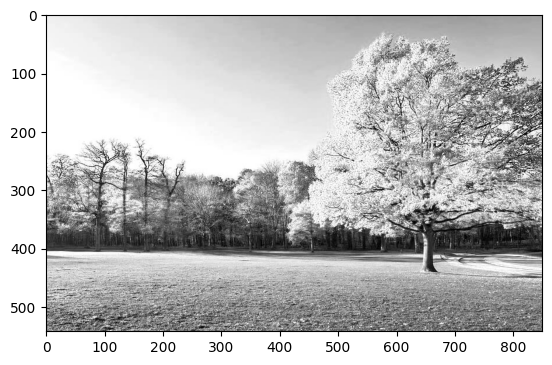

In [56]:
plt.imshow(gray_blue)
plt.show()

#Problema 4: Histogramas

In [95]:
def Histogramas(imagen):
  #Creando imagen gray y los promedios de cada canala
  alto = imagen.shape[0]
  ancho = imagen.shape[1]
  gris_aritmetico = np.zeros((alto,ancho,1))
  rojo = 0
  verde = 0
  azul = 0
  for i in range(0,alto):
    for j in range(0,ancho):
      pixel=(img[i,j])

      rojo+=pixel[0]
      verde+=pixel[1]
      azul+=pixel[2]

      gris_aritmetico[i,j]= np.mean(pixel)

  #Promedios
  rojo = rojo/(alto*ancho)
  verde = verde/(alto*ancho)
  azul= azul/(alto*ancho)






  cv2.imwrite("gris_aritmetico.jpg",gris_aritmetico)
  gris_aritmetico =cv2.imread("/content/gris_aritmetico.jpg")


  #Color Blue
  hist1= cv2.calcHist([imagen], [0], None, [256],[0,256])
  plt.plot(hist1, color="b")
  plt.axvline(x=np.mean(azul), color="k", label="Promedio")
  plt.xlabel("Intensidad de Pixel Azul")
  plt.ylabel("densidad")
  plt.title("Histograma Canal Rojo de Imagen Original")
  plt.show()

  #Color Green
  hist2= cv2.calcHist([imagen], [1], None, [256],[0,256])
  plt.plot(hist2, color="g")
  plt.axvline(x=np.mean(verde), color="k", label="Promedio")
  plt.xlabel("Intensidad de Pixel Verde")
  plt.ylabel("densidad")
  plt.title("Histograma Canal Verde de Imagen Original")
  plt.show()

  #Color Red

  hist3= cv2.calcHist([imagen], [2], None, [256],[0,256])
  plt.plot(hist3, color="r")
  plt.axvline(x=np.mean(rojo), color="k", label="Promedio")
  plt.xlabel("Intensidad de Pixel Rojo")
  plt.ylabel("densidad")
  plt.title("Histograma Canal Rojo de Imagen Original")
  plt.show()



  #Creando histograma gray
  hist3= cv2.calcHist([gris_aritmetico], [0], None, [256],[0,256])
  plt.plot(hist3, color="r")
  plt.axvline(x=np.mean(gris_aritmetico), color="k", label="Promedio")
  plt.xlabel("Intensidad de Pixel Gris Promedio")
  plt.ylabel("densidad")
  plt.title("Histograma Gris de Imagen Original")
  plt.show()




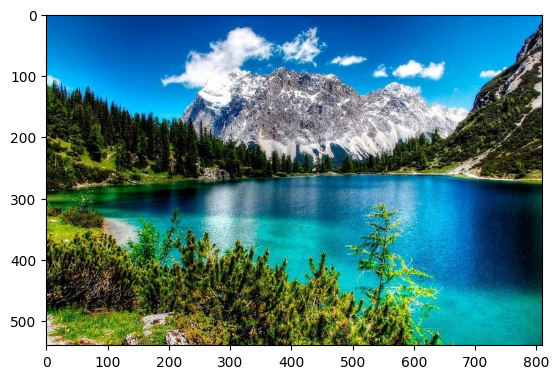

In [83]:
imagen= cv2.imread("/content/new_image.jpg")
imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
plt.imshow(imagen)
plt.show()

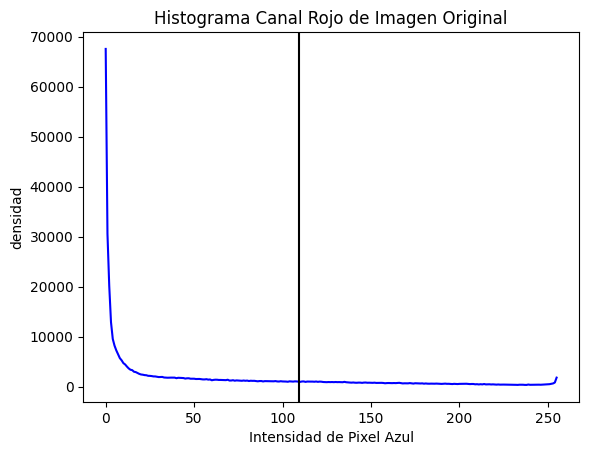

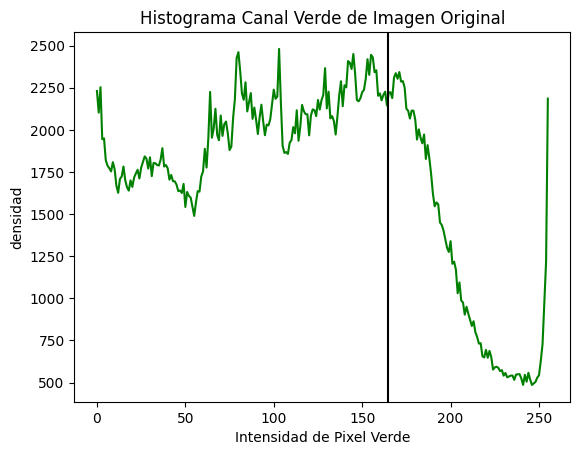

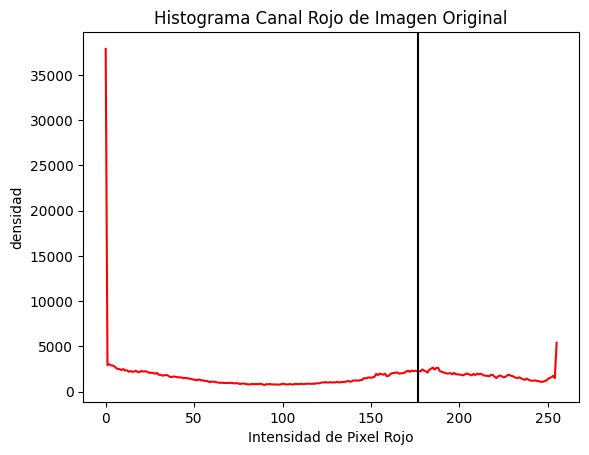

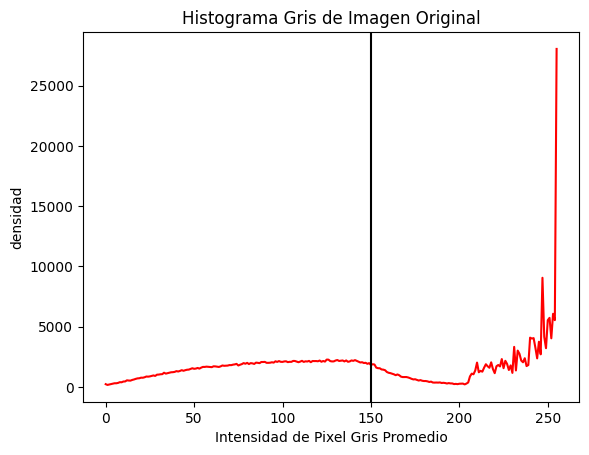

In [96]:
Histogramas(imagen)